# Coursework 1 

## Step 1:
The problem I am trying to solve is is defining the topic of reuters articles using reuters database. There are 46 different topics and these will be my labels. 
## Step 2:
The measure of success will be the accuracy that the model selects the topic answer because this is an classification problem that will be sovled by the model rather than a regression problem that would be more likely to require more precision. This also means that I will use categorical_crossentropy as my loss function because this is a multi class, single label problem
## Step 3:
For validation I will use a simple hold-out validation beacuse I have enough data points to work with and itt is the simplest to implement. This will be an 80 - 20 percent split there for I will have a validation set of size 1,796.

In [65]:
## Importing modules to used later
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

## Step 4
Firstly I will prepare the data by using vectorisation for the data being inserted into the models, Next I will one hot encode the labels allowing them to be understood by the models turning them into 46 length arrays. By the end x_val and y_val are the validation set of data and labels, while the rest (partial_x_train and partial_y_train) are the training set.

In [68]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_val = x_train[:1796]
partial_x_train = x_train[1796:]

y_val = one_hot_train_labels[:1796]
partial_y_train = one_hot_train_labels[1796:]

## Step 5
This data set is a not evenly distributed dataset as seen from the graph below with labels 4 and 5 being 14% of the entire training set. But appart from that I will assume that it is an evenly distributed model with everything having a 1/46 change of being selected.

[ 12. 105.  20. 813. 474.   5.  14.   3.  38.  25.  30.  83.  13.  37.
   2.   9.  99.  12.  20. 133.  70.  27.   7.  12.  19.  31.   8.   4.
  10.   4.  12.  13.  10.   5.   7.   6.  11.   2.   3.   5.  10.   8.
   3.   6.   5.   1.]


<BarContainer object of 46 artists>

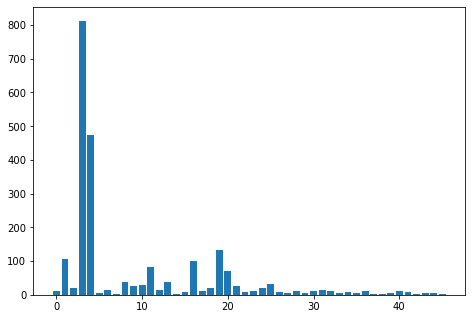

In [75]:
labelsCount = np.zeros((46))
bottomMax =np.zeros((46))

for x in range(46):
    bottomMax[x] = x 

for x in test_labels:
    labelsCount[x] += 1
    
x = 0

print(labelsCount)

for y in labelsCount:
    x += y


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(bottomMax,labelsCount)

The first function plots train vs validation losses
Second function plots train vs validation accuracy
Third compares the best models validation accuracy vs current

In [4]:
def plot_loss(history):

    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    red = 'ro'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, red, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.savefig('overfitting.eps', format = 'eps')
    plt.show()
    
    
    
def plot_acc(history):
    
    history_dict = history.history
    
    plt.clf()

    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'ro', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
    
def plot_comp_acc(historyX, historyY):
    history_dictX = historyX.history
    history_dictY = historyY.history
    
    plt.clf()
    
    accBefore = history_dictX['val_accuracy']
    accAfter = history_dictY['val_accuracy']
    
    epochs = range(1, len(accBefore) + 1)
    
    plt.plot(epochs, accBefore, 'r', label = 'Val best')
    plt.plot(epochs, accAfter, 'b', label = 'Val After')
    plt.title('Best vs Current Model')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


### Creating a underfitting model:
I will create an underfitting model with a structure of 20 - 46. 

In [94]:

def buildNeuralOne(neurons, ep):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dense(46, activation = 'softmax'))
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])


    history = model.fit(partial_x_train, 
                        partial_y_train,
                        epochs = ep,
                        batch_size = 512,
                        validation_data = (x_val, y_val))
    
    test_loss, test_acc = model.evaluate(x_test,one_hot_test_labels)
    
    return history

Train on 7186 samples, validate on 1796 samples
Epoch 1/10
7186/7186 [==============================] - 1s 171us/sample - loss: 3.3478 - accuracy: 0.4975 - val_loss: 2.8815 - val_accuracy: 0.5685
Epoch 2/10
7186/7186 [==============================] - 1s 91us/sample - loss: 2.5660 - accuracy: 0.6208 - val_loss: 2.3122 - val_accuracy: 0.6225
Epoch 3/10
7186/7186 [==============================] - 1s 90us/sample - loss: 2.0352 - accuracy: 0.6721 - val_loss: 1.9420 - val_accuracy: 0.6514
Epoch 4/10
7186/7186 [==============================] - 1s 89us/sample - loss: 1.6756 - accuracy: 0.6979 - val_loss: 1.6907 - val_accuracy: 0.6726
Epoch 5/10
7186/7186 [==============================] - 1s 91us/sample - loss: 1.4169 - accuracy: 0.7268 - val_loss: 1.5338 - val_accuracy: 0.6843
Epoch 6/10
7186/7186 [==============================] - 1s 91us/sample - loss: 1.2315 - accuracy: 0.7526 - val_loss: 1.3984 - val_accuracy: 0.7049
Epoch 7/10
7186/7186 [==============================] - 1s 92us/sampl

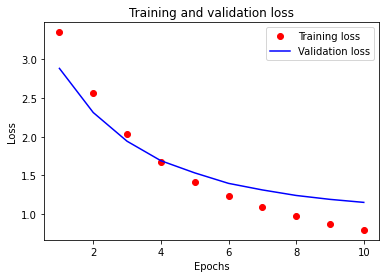

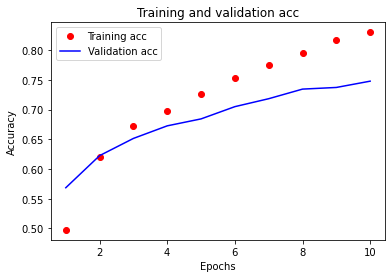

In [95]:
underFitting = buildNeuralOne(20,10)
plot_loss(underFitting)
plot_acc(underFitting)

## What is happening
Because my data set isn't evenly distributed the model will chose the most common answer and probably be right therefore it is more difficult to get the model to underfit but still has statistical power

## Step 6
I am developing a larger network with more overfitting and trying to regualarize them by adjusting the hyper parameterrs.

The next table is a report of my results if you want to go further my interpretation of the results are under each experiment as well as a comaprison to the best model I built at the time.

Key: 
N/A: means too much statistical variance 

l2(x): means an l2 regularizer at penalty x

DO(x): means drop out at x

Model X : Structure

|Model|Layers|Structure|Epochs|Batch size|Accuracy - Val|Epoch -heighest|Ovr-fitting or un-Fitting|
|-----|------|-------|------|----------|--------------|---------------|-------------------------|
|1|2|48,46|20|512|80.90%|15|overfitting|
|2|2|48(l2=0.01),46|20|512|75.56%|20|overfitting|
|3|2|200(l2=0.01),46|20|512|N/A|N/A|overfitting|
|4|2|300(l2=0.01),46|20|512|N/A|N/A|overfitting|
|5|2|300(l2=0.01),DO(0.5),46|20|512|N/A|N/A|overfitting|
|6|2|300(l2=0.01),DO(0.25),46|20|512|N/A|N/A|overfitting|
|7|2|300,DO(0.25),46|20|512|79.01%|5|overfitting|
|8|2|300,DO(0.4),46|20|512|80.57%|8|overfitting|
|9|2|100,DO(0.5),46|20|512|81.01%|17|overfitting|
|10|2|75,DO(0.5),46|20|512|78.15%|20|overfitting|
|11|3|20,20,46|20|512|78.56%|20|overfitting|
|12|3|48,48,46|20|512|79.68%|11|overfitting|
|13|3|48(l2=0.01),48,46|20|512|77.17%|18|overfitting|
|14|3|48(l2=0.01),48(l2=0.01),46|20|512|73.78%|16|overfitting|
|15|3|48,DO(0.5),48,46|20|512|73.90%|20|overfitting|
|16|3|100,DO(0.5),48,46|20|512|80.57%|20|overfitting|
|17|3|100,DO(0.5),100,48|20|512|80.85%|18|overfitting|
|18|3|120,DO(0.5),120,48|20|512|80.85%|15|overfitting|


# Model 1:

## Network Struture: 48,46 	

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 1s 182us/sample - loss: 2.7450 - accuracy: 0.4960 - val_loss: 2.0525 - val_accuracy: 0.6258
Epoch 2/20
7186/7186 [==============================] - 1s 99us/sample - loss: 1.6840 - accuracy: 0.6894 - val_loss: 1.6142 - val_accuracy: 0.6720
Epoch 3/20
7186/7186 [==============================] - 1s 102us/sample - loss: 1.2810 - accuracy: 0.7445 - val_loss: 1.3875 - val_accuracy: 0.7004
Epoch 4/20
7186/7186 [==============================] - 1s 98us/sample - loss: 1.0387 - accuracy: 0.7843 - val_loss: 1.2455 - val_accuracy: 0.7378
Epoch 5/20
7186/7186 [==============================] - 1s 99us/sample - loss: 0.8685 - accuracy: 0.8208 - val_loss: 1.1659 - val_accuracy: 0.7455
Epoch 6/20
7186/7186 [==============================] - 1s 104us/sample - loss: 0.7358 - accuracy: 0.8489 - val_loss: 1.1000 - val_accuracy: 0.7639
Epoch 7/20
7186/7186 [==============================] - 1s 100us/sa

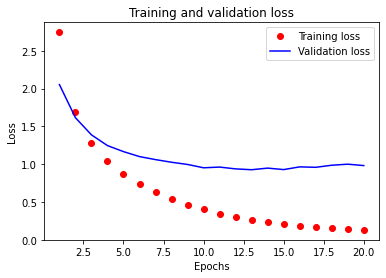

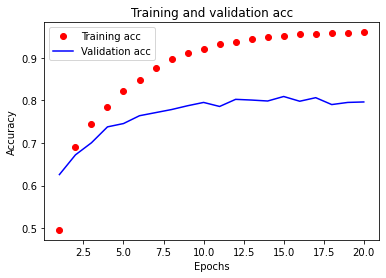

In [96]:
testOne = buildNeuralOne(48,20)
plot_loss(testOne)
plot_acc(testOne)

## Results:
Relatively small neural network with 2 layers degridation of learning (overfitting) begins at the 4-5th epoch will try to elivate this by using L2 in the first layer and try to improve accuracy

Heighest validation epoch 15 0.890

# Model 2: 48(l2=0.01),46

In [102]:
def buildNeuralTwo(neurons, ep, do):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation = 'relu', kernel_regularizer=keras.regularizers.l2(l=do),input_shape = (10000,)))
   # model.add(layers.Dropout(do))
    model.add(layers.Dense(46, activation = 'softmax'))
    
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    #mess with the hyperparameters (weights) Dropout
    #L2 


    history = model.fit(partial_x_train, 
                        partial_y_train,
                        epochs = ep,
                        batch_size = 512,
                        validation_data = (x_val, y_val))
    
    test_loss, test_acc = model.evaluate(x_test,one_hot_test_labels)
    
    return history

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 1s 189us/sample - loss: 3.3063 - accuracy: 0.5377 - val_loss: 2.4330 - val_accuracy: 0.5997
Epoch 2/20
7186/7186 [==============================] - 1s 105us/sample - loss: 2.1244 - accuracy: 0.6623 - val_loss: 1.9561 - val_accuracy: 0.6531
Epoch 3/20
7186/7186 [==============================] - 1s 102us/sample - loss: 1.7608 - accuracy: 0.7003 - val_loss: 1.7674 - val_accuracy: 0.6726
Epoch 4/20
7186/7186 [==============================] - 1s 104us/sample - loss: 1.5841 - accuracy: 0.7250 - val_loss: 1.6498 - val_accuracy: 0.6832
Epoch 5/20
7186/7186 [==============================] - 1s 103us/sample - loss: 1.4803 - accuracy: 0.7446 - val_loss: 1.5924 - val_accuracy: 0.7027
Epoch 6/20
7186/7186 [==============================] - 1s 104us/sample - loss: 1.4109 - accuracy: 0.7598 - val_loss: 1.5390 - val_accuracy: 0.7144
Epoch 7/20
7186/7186 [==============================] - 1s 105us

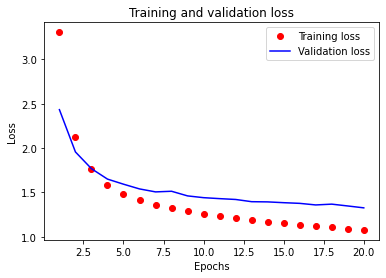

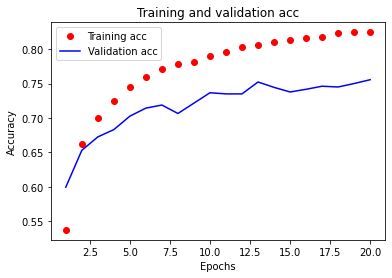

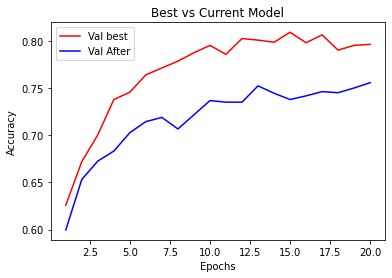

In [103]:
testTwo = buildNeuralTwo(48,20,0.01)
plot_loss(testTwo)
plot_acc(testTwo)
plot_comp_acc(testOne,testTwo)


## Results
I tried L2 regularization with 0.1, instead of 0.01 in the beginning but that reduced accuracy by 5 to 10 created far to tight overfitting and variance but even at a tenth of the penalty accuracy suffers but over fitting is delayed compared to the first model

I'll try to improve accuracy by increasing amount of neurons 

# Model 3: 200(l2=0.01),46

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 2s 289us/sample - loss: 3.6408 - accuracy: 0.5802 - val_loss: 2.0460 - val_accuracy: 0.6704
Epoch 2/20
7186/7186 [==============================] - 1s 196us/sample - loss: 1.6893 - accuracy: 0.7350 - val_loss: 1.6635 - val_accuracy: 0.6915
Epoch 3/20
7186/7186 [==============================] - 1s 188us/sample - loss: 1.4229 - accuracy: 0.7668 - val_loss: 1.5374 - val_accuracy: 0.7249
Epoch 4/20
7186/7186 [==============================] - 1s 190us/sample - loss: 1.3159 - accuracy: 0.7896 - val_loss: 1.5000 - val_accuracy: 0.7305
Epoch 5/20
7186/7186 [==============================] - 1s 188us/sample - loss: 1.2538 - accuracy: 0.8031 - val_loss: 1.5116 - val_accuracy: 0.7027
Epoch 6/20
7186/7186 [==============================] - 1s 191us/sample - loss: 1.2084 - accuracy: 0.8096 - val_loss: 1.4657 - val_accuracy: 0.7272
Epoch 7/20
7186/7186 [==============================] - 1s 196us

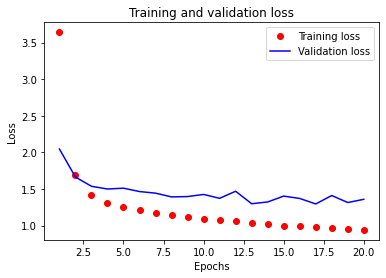

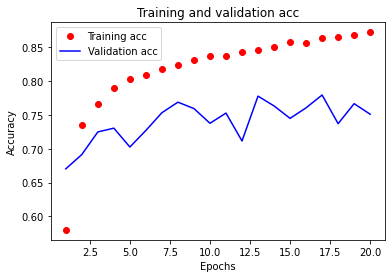

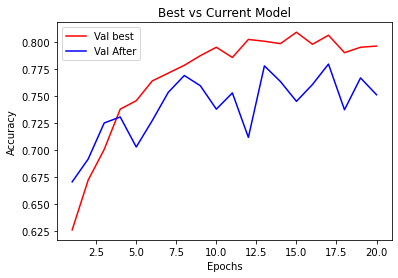

In [104]:
testThree = buildNeuralTwo(200,20,0.01)
plot_loss(testThree)
plot_acc(testThree)
plot_comp_acc(testOne,testThree)


## Result 
Accuracy is increasing but the variance is increasing to meaning that this model is too unstable for use

# Model 4: 300(l2=0.01),46 	

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 3s 352us/sample - loss: 4.0194 - accuracy: 0.5921 - val_loss: 2.0443 - val_accuracy: 0.6592
Epoch 2/20
7186/7186 [==============================] - 2s 275us/sample - loss: 1.6441 - accuracy: 0.7488 - val_loss: 1.6529 - val_accuracy: 0.6932
Epoch 3/20
7186/7186 [==============================] - 2s 262us/sample - loss: 1.3888 - accuracy: 0.7793 - val_loss: 1.5549 - val_accuracy: 0.7082
Epoch 4/20
7186/7186 [==============================] - 2s 256us/sample - loss: 1.3047 - accuracy: 0.7964 - val_loss: 1.5531 - val_accuracy: 0.7166
Epoch 5/20
7186/7186 [==============================] - 2s 255us/sample - loss: 1.2393 - accuracy: 0.8074 - val_loss: 1.4297 - val_accuracy: 0.7528
Epoch 6/20
7186/7186 [==============================] - 2s 255us/sample - loss: 1.1998 - accuracy: 0.8138 - val_loss: 1.4558 - val_accuracy: 0.7528
Epoch 7/20
7186/7186 [==============================] - 2s 254us

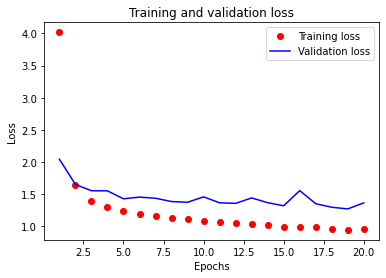

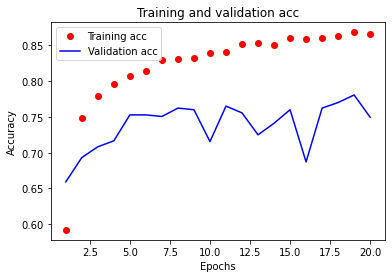

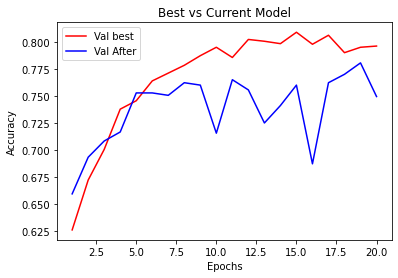

In [105]:
testFour = buildNeuralTwo(300,20,0.01)
plot_loss(testFour)
plot_acc(testFour)
plot_comp_acc(testOne,testFour)

## Results 
It seams if I add l2 regularisers to a large layer of neural networks the variance increases making the whole model unstable.

# Model 5: 300(l2=0.01),DO(0.5),46 

In [106]:
def buildNeuralFive(neurons, ep, lt,do):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation = 'relu', kernel_regularizer=keras.regularizers.l2(l=do),input_shape = (10000,)))
    model.add(layers.Dropout(do))
    model.add(layers.Dense(46, activation = 'softmax'))
    
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    #mess with the hyperparameters (weights) Dropout
    #L2 


    history = model.fit(partial_x_train, 
                        partial_y_train,
                        epochs = ep,
                        batch_size = 512,
                        validation_data = (x_val, y_val))
    
    test_loss, test_acc = model.evaluate(x_test,one_hot_test_labels)
    
    return history

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 3s 361us/sample - loss: 82.0625 - accuracy: 0.4449 - val_loss: 9.7965 - val_accuracy: 0.4749
Epoch 2/20
7186/7186 [==============================] - 2s 264us/sample - loss: 4.6635 - accuracy: 0.5134 - val_loss: 2.8668 - val_accuracy: 0.5184
Epoch 3/20
7186/7186 [==============================] - 2s 260us/sample - loss: 2.6319 - accuracy: 0.5207 - val_loss: 2.9010 - val_accuracy: 0.5301
Epoch 4/20
7186/7186 [==============================] - 2s 259us/sample - loss: 2.6139 - accuracy: 0.5285 - val_loss: 2.8764 - val_accuracy: 0.4716
Epoch 5/20
7186/7186 [==============================] - 2s 261us/sample - loss: 2.6564 - accuracy: 0.5276 - val_loss: 2.8585 - val_accuracy: 0.4994
Epoch 6/20
7186/7186 [==============================] - 2s 269us/sample - loss: 2.6816 - accuracy: 0.5287 - val_loss: 2.8171 - val_accuracy: 0.5178
Epoch 7/20
7186/7186 [==============================] - 2s 265u

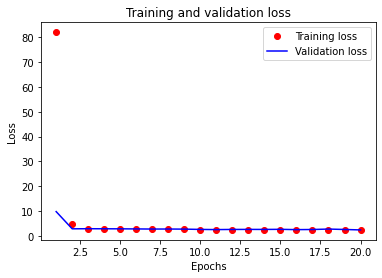

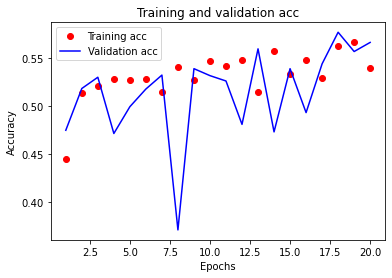

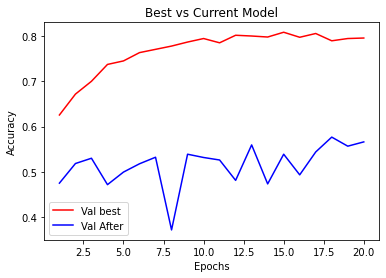

In [107]:
testFive = buildNeuralFive(300,20,0.01,0.5)
plot_loss(testFive)
plot_acc(testFive)
plot_comp_acc(testOne,testFive)

## Results
Combining two regularisers on an model increases variance making the model useless I estimate this is due to the spreading out of information through the layer making the information diffuse and adding loss functions to that creates information loss

# Model 6: 300(l2=0.01),DO(0.25),46 	

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 3s 355us/sample - loss: 42.4099 - accuracy: 0.4627 - val_loss: 6.0873 - val_accuracy: 0.4788
Epoch 2/20
7186/7186 [==============================] - 2s 258us/sample - loss: 3.4296 - accuracy: 0.5438 - val_loss: 2.5670 - val_accuracy: 0.5685
Epoch 3/20
7186/7186 [==============================] - 2s 258us/sample - loss: 2.3493 - accuracy: 0.5704 - val_loss: 2.7178 - val_accuracy: 0.5156
Epoch 4/20
7186/7186 [==============================] - 2s 267us/sample - loss: 2.3576 - accuracy: 0.5790 - val_loss: 2.4159 - val_accuracy: 0.5028
Epoch 5/20
7186/7186 [==============================] - 2s 278us/sample - loss: 2.3075 - accuracy: 0.5596 - val_loss: 2.5339 - val_accuracy: 0.5373
Epoch 6/20
7186/7186 [==============================] - 2s 285us/sample - loss: 2.3310 - accuracy: 0.5903 - val_loss: 2.5343 - val_accuracy: 0.5551
Epoch 7/20
7186/7186 [==============================] - 2s 273u

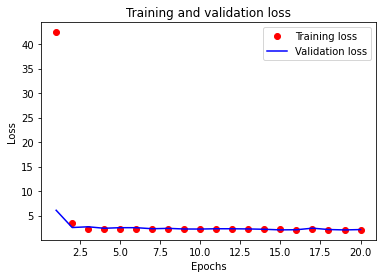

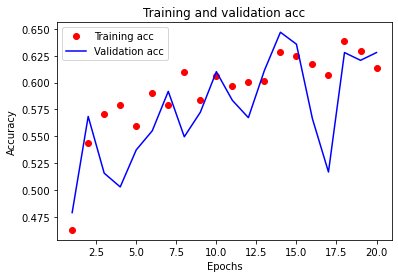

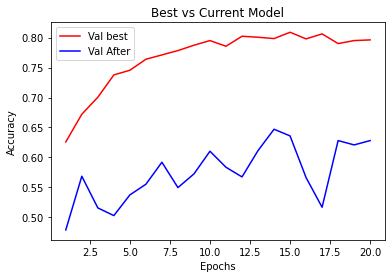

In [109]:
testSix = buildNeuralFive(300,20,0.01,0.25)
plot_loss(testSix)
plot_acc(testSix)
plot_comp_acc(testOne,testSix)

## Results
Same problem of variance even when ratios are reduced

# Model 7: 300,DO(0.25),46 	


In [110]:
def buildNeuralSeven(neurons, ep,do):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation = 'relu',input_shape = (10000,)))
    model.add(layers.Dropout(do))
    model.add(layers.Dense(46, activation = 'softmax'))
    
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    #mess with the hyperparameters (weights) Dropout
    #L2 


    history = model.fit(partial_x_train, 
                        partial_y_train,
                        epochs = ep,
                        batch_size = 512,
                        validation_data = (x_val, y_val))
    
    test_loss, test_acc = model.evaluate(x_test,one_hot_test_labels)
    
    return history

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 2s 304us/sample - loss: 2.0230 - accuracy: 0.6005 - val_loss: 1.3972 - val_accuracy: 0.6949
Epoch 2/20
7186/7186 [==============================] - 2s 220us/sample - loss: 0.9698 - accuracy: 0.7978 - val_loss: 1.0888 - val_accuracy: 0.7661
Epoch 3/20
7186/7186 [==============================] - 2s 222us/sample - loss: 0.6597 - accuracy: 0.8654 - val_loss: 0.9753 - val_accuracy: 0.7918
Epoch 4/20
7186/7186 [==============================] - 2s 224us/sample - loss: 0.4753 - accuracy: 0.9040 - val_loss: 0.9546 - val_accuracy: 0.7901
Epoch 5/20
7186/7186 [==============================] - 2s 224us/sample - loss: 0.3554 - accuracy: 0.9244 - val_loss: 0.9052 - val_accuracy: 0.8057
Epoch 6/20
7186/7186 [==============================] - 2s 217us/sample - loss: 0.2775 - accuracy: 0.9414 - val_loss: 0.9133 - val_accuracy: 0.8051
Epoch 7/20
7186/7186 [==============================] - 2s 221us

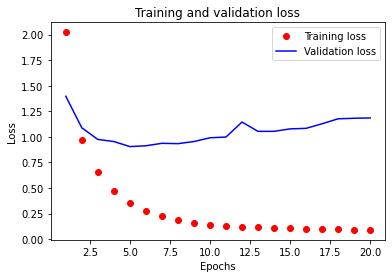

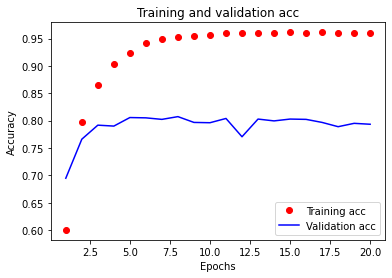

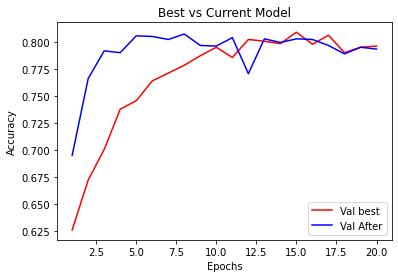

In [111]:
testSeven = buildNeuralSeven(300,20,0.25)
plot_loss(testSeven)
plot_acc(testSeven)
plot_comp_acc(testOne,testSeven)

## Results 

Drop-out seems to be a far more stable regularizer than l2 regularization. Due to this models first layer size the over fitting is earlier on the validation set but the accuracy is higher than my previous best model. If I removed the dropout I think the overfitting will over whelm the accuracy. So I will increase drop out

# Model 8: 300,DO(0.4),46 	

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 2s 310us/sample - loss: 2.0478 - accuracy: 0.6040 - val_loss: 1.3669 - val_accuracy: 0.6982
Epoch 2/20
7186/7186 [==============================] - 2s 222us/sample - loss: 1.0183 - accuracy: 0.7869 - val_loss: 1.1170 - val_accuracy: 0.7528
Epoch 3/20
7186/7186 [==============================] - 2s 225us/sample - loss: 0.7176 - accuracy: 0.8514 - val_loss: 1.0008 - val_accuracy: 0.7845
Epoch 4/20
7186/7186 [==============================] - 2s 221us/sample - loss: 0.5330 - accuracy: 0.8941 - val_loss: 0.9387 - val_accuracy: 0.7923
Epoch 5/20
7186/7186 [==============================] - 2s 218us/sample - loss: 0.4079 - accuracy: 0.9186 - val_loss: 0.9184 - val_accuracy: 0.7957
Epoch 6/20
7186/7186 [==============================] - 2s 222us/sample - loss: 0.3237 - accuracy: 0.9313 - val_loss: 0.9019 - val_accuracy: 0.8057
Epoch 7/20
7186/7186 [==============================] - 2s 221us

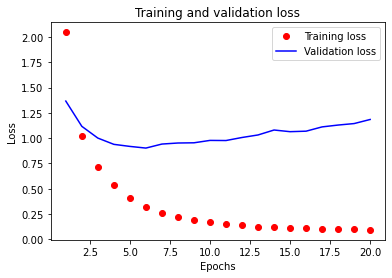

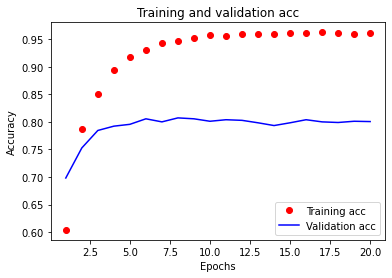

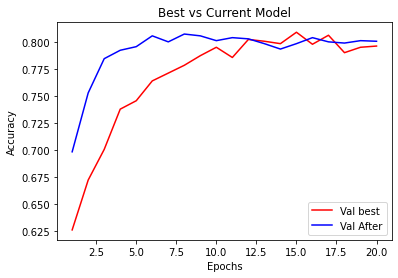

In [113]:
testEight = buildNeuralSeven(300,20,0.4)
plot_loss(testEight)
plot_acc(testEight)
plot_comp_acc(testOne,testEight)

## Results
Improvement on model accuracy because overfitting has been reduced. This has also reduced statistical variance on the validation set. But overfitting is still way larger than model 1 because of excessive network capacity, next i will reduce network capcity. New best model

# Model 9: 100,DO(0.5),46 	

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 2s 227us/sample - loss: 2.6405 - accuracy: 0.5255 - val_loss: 1.8270 - val_accuracy: 0.6498
Epoch 2/20
7186/7186 [==============================] - 1s 147us/sample - loss: 1.6064 - accuracy: 0.6766 - val_loss: 1.4329 - val_accuracy: 0.6921
Epoch 3/20
7186/7186 [==============================] - 1s 150us/sample - loss: 1.2456 - accuracy: 0.7410 - val_loss: 1.2485 - val_accuracy: 0.7305
Epoch 4/20
7186/7186 [==============================] - 1s 150us/sample - loss: 1.0197 - accuracy: 0.7829 - val_loss: 1.1515 - val_accuracy: 0.7494
Epoch 5/20
7186/7186 [==============================] - 1s 135us/sample - loss: 0.8771 - accuracy: 0.8137 - val_loss: 1.0986 - val_accuracy: 0.7639
Epoch 6/20
7186/7186 [==============================] - 1s 138us/sample - loss: 0.7519 - accuracy: 0.8440 - val_loss: 1.0331 - val_accuracy: 0.7734
Epoch 7/20
7186/7186 [==============================] - 1s 133us

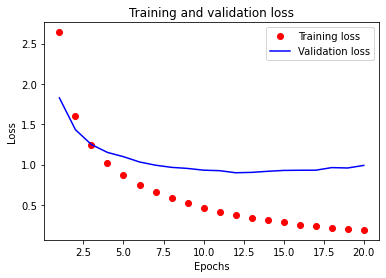

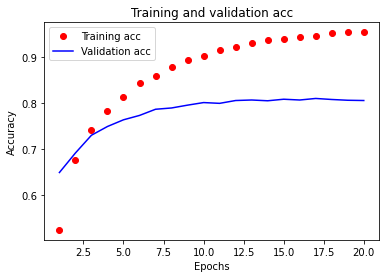

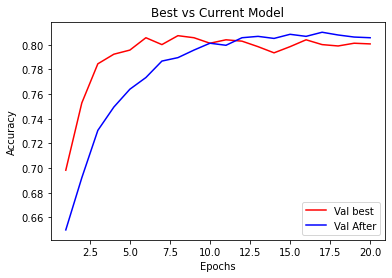

In [114]:
testNine = buildNeuralSeven(100,20,0.5)
plot_loss(testNine)
plot_acc(testNine)
plot_comp_acc(testEight,testNine)

## Results 
Minor improvement to accuracy but major reduction to overfitting another next reduction in size of network. (more of same) (new best)

# Model 10: 75,DO(0.5),46 	

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 2s 219us/sample - loss: 2.8055 - accuracy: 0.4923 - val_loss: 2.0044 - val_accuracy: 0.6320
Epoch 2/20
7186/7186 [==============================] - 1s 129us/sample - loss: 1.7813 - accuracy: 0.6538 - val_loss: 1.5497 - val_accuracy: 0.6826
Epoch 3/20
7186/7186 [==============================] - 1s 130us/sample - loss: 1.3930 - accuracy: 0.7129 - val_loss: 1.3445 - val_accuracy: 0.7032
Epoch 4/20
7186/7186 [==============================] - 1s 131us/sample - loss: 1.1697 - accuracy: 0.7498 - val_loss: 1.2191 - val_accuracy: 0.7277
Epoch 5/20
7186/7186 [==============================] - 1s 134us/sample - loss: 1.0082 - accuracy: 0.7863 - val_loss: 1.1359 - val_accuracy: 0.7506
Epoch 6/20
7186/7186 [==============================] - 1s 125us/sample - loss: 0.8932 - accuracy: 0.8099 - val_loss: 1.0821 - val_accuracy: 0.7650
Epoch 7/20
7186/7186 [==============================] - 1s 131us

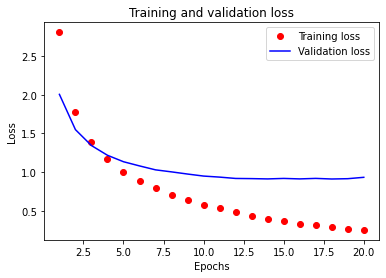

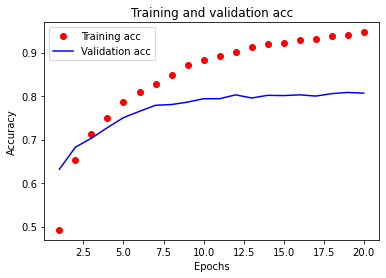

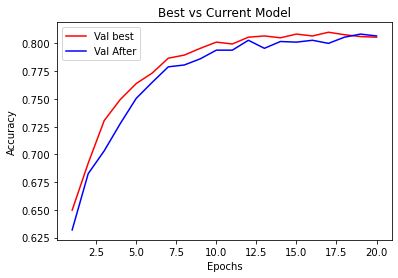

In [115]:
testTen = buildNeuralSeven(75,20,0.5)
plot_loss(testTen)
plot_acc(testTen)
plot_comp_acc(testNine,testTen)

## Results

I think the maximum accuracy that can be achived by a two layer model is around 81% and therefore I will increase size of model and use more regulirization tools

# Model 11: 20,20,46

In [116]:
def buildNeuralEleven(neuronsOne, neuronsTwo, ep):
    model = models.Sequential()
    
    model.add(layers.Dense(neuronsOne, activation = 'relu',input_shape = (10000,)))
    model.add(layers.Dense(neuronsTwo, activation = 'relu'))
    
    model.add(layers.Dense(46, activation = 'softmax'))
    
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    #mess with the hyperparameters (weights) Dropout
    #L2 


    history = model.fit(partial_x_train, 
                        partial_y_train,
                        epochs = ep,
                        batch_size = 512,
                        validation_data = (x_val, y_val))
    
    test_loss, test_acc = model.evaluate(x_test,one_hot_test_labels)
    
    return history

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 1s 188us/sample - loss: 3.4063 - accuracy: 0.3685 - val_loss: 2.8927 - val_accuracy: 0.4638
Epoch 2/20
7186/7186 [==============================] - 1s 97us/sample - loss: 2.5370 - accuracy: 0.5674 - val_loss: 2.2412 - val_accuracy: 0.5757
Epoch 3/20
7186/7186 [==============================] - 1s 95us/sample - loss: 1.9624 - accuracy: 0.6220 - val_loss: 1.8604 - val_accuracy: 0.6186
Epoch 4/20
7186/7186 [==============================] - 1s 96us/sample - loss: 1.6116 - accuracy: 0.6682 - val_loss: 1.6314 - val_accuracy: 0.6347
Epoch 5/20
7186/7186 [==============================] - 1s 99us/sample - loss: 1.3801 - accuracy: 0.7072 - val_loss: 1.4788 - val_accuracy: 0.6737
Epoch 6/20
7186/7186 [==============================] - 1s 99us/sample - loss: 1.2178 - accuracy: 0.7392 - val_loss: 1.3911 - val_accuracy: 0.6882
Epoch 7/20
7186/7186 [==============================] - 1s 94us/sampl

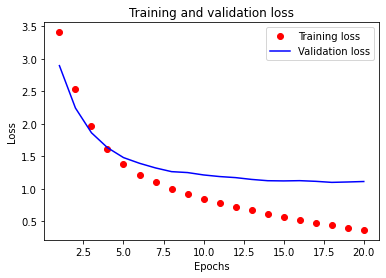

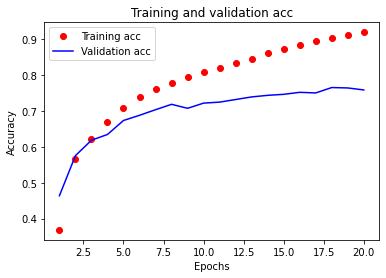

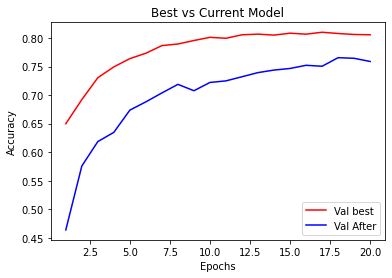

In [118]:
testEleven = buildNeuralEleven(20,20,20)
plot_loss(testEleven)
plot_acc(testEleven)
plot_comp_acc(testNine,testEleven)

## Results:
Accuracy is still relatively low compared to the best two layer model but overfitting is lower because of information bottle neck so I will increase the size of the network

# Model 12: 48,48,46 	

Doubling both neurons to produce a more accurate model

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 1s 195us/sample - loss: 2.7627 - accuracy: 0.5106 - val_loss: 2.0004 - val_accuracy: 0.5824
Epoch 2/20
7186/7186 [==============================] - 1s 105us/sample - loss: 1.6060 - accuracy: 0.6724 - val_loss: 1.5687 - val_accuracy: 0.6537
Epoch 3/20
7186/7186 [==============================] - 1s 105us/sample - loss: 1.2291 - accuracy: 0.7289 - val_loss: 1.3570 - val_accuracy: 0.7021
Epoch 4/20
7186/7186 [==============================] - 1s 101us/sample - loss: 1.0150 - accuracy: 0.7736 - val_loss: 1.2512 - val_accuracy: 0.7272
Epoch 5/20
7186/7186 [==============================] - 1s 102us/sample - loss: 0.8519 - accuracy: 0.8137 - val_loss: 1.1742 - val_accuracy: 0.7361
Epoch 6/20
7186/7186 [==============================] - 1s 104us/sample - loss: 0.7217 - accuracy: 0.8457 - val_loss: 1.1606 - val_accuracy: 0.7472
Epoch 7/20
7186/7186 [==============================] - 1s 104us

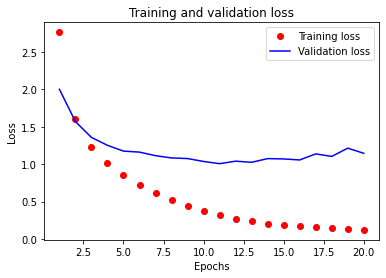

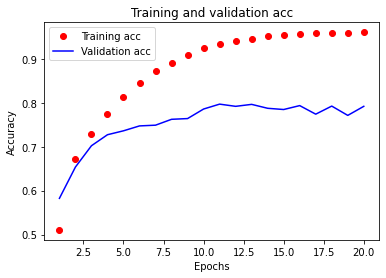

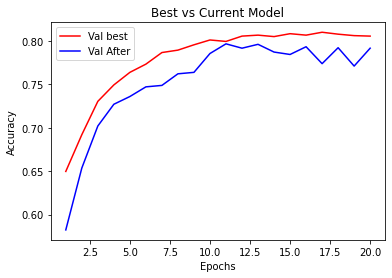

In [119]:
testTwelve = buildNeuralEleven(48,48,20)
plot_loss(testTwelve)
plot_acc(testTwelve)
plot_comp_acc(testNine,testTwelve)

## Results: 
Overfitting has increased due to network size but accuracy is still lower than my best 1 layer model, so I will regularize to improve the accuracy of validation rather than use a larger network because it is overfitting too much  

# Model 13: 48(l2=0.01),48,46 	

In [120]:
def buildNeuralThirteen(neuronsOne, neuronsTwo,lTwoOne, ep):
    model = models.Sequential()
    
    model.add(layers.Dense(neuronsOne, activation = 'relu', kernel_regularizer=keras.regularizers.l2(l=lTwoOne),input_shape = (10000,)))
    model.add(layers.Dense(neuronsTwo, activation = 'relu'))
    
    model.add(layers.Dense(46, activation = 'softmax'))
    
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    #mess with the hyperparameters (weights) Dropout
    #L2 


    history = model.fit(partial_x_train, 
                        partial_y_train,
                        epochs = ep,
                        batch_size = 512,
                        validation_data = (x_val, y_val))
    
    test_loss, test_acc = model.evaluate(x_test,one_hot_test_labels)
    
    return history

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 1s 199us/sample - loss: 3.2622 - accuracy: 0.4748 - val_loss: 2.3089 - val_accuracy: 0.5713
Epoch 2/20
7186/7186 [==============================] - 1s 105us/sample - loss: 1.9831 - accuracy: 0.6308 - val_loss: 1.8636 - val_accuracy: 0.6453
Epoch 3/20
7186/7186 [==============================] - 1s 104us/sample - loss: 1.6609 - accuracy: 0.6829 - val_loss: 1.6944 - val_accuracy: 0.6526
Epoch 4/20
7186/7186 [==============================] - 1s 109us/sample - loss: 1.5108 - accuracy: 0.7022 - val_loss: 1.6033 - val_accuracy: 0.6826
Epoch 5/20
7186/7186 [==============================] - 1s 111us/sample - loss: 1.4135 - accuracy: 0.7192 - val_loss: 1.5365 - val_accuracy: 0.6932
Epoch 6/20
7186/7186 [==============================] - 1s 109us/sample - loss: 1.3337 - accuracy: 0.7421 - val_loss: 1.4737 - val_accuracy: 0.6999
Epoch 7/20
7186/7186 [==============================] - 1s 106us

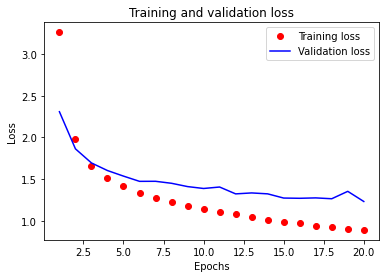

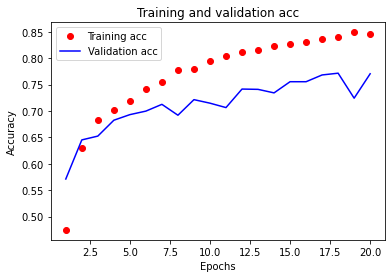

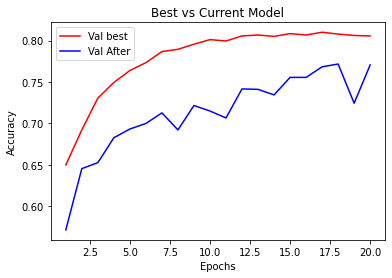

In [121]:
testThirteen = buildNeuralThirteen(48,48,0.01,20)
plot_loss(testThirteen)
plot_acc(testThirteen)
plot_comp_acc(testNine,testThirteen)

## Results:
L2 regularizers seem to be far more unstable than dropout in causing statistical variance 

# Model 14: 48(l2=0.01),48(l2=0.01),46

In [122]:
def buildNeuralFourteen(neuronsOne, neuronsTwo,lTwoOne,lTwoTwo, ep):
    model = models.Sequential()
    
    model.add(layers.Dense(neuronsOne, activation = 'relu', kernel_regularizer=keras.regularizers.l2(l=lTwoOne),input_shape = (10000,)))
    model.add(layers.Dense(neuronsTwo, activation = 'relu', kernel_regularizer=keras.regularizers.l2(l=lTwoTwo)))
    model.add(layers.Dense(46, activation = 'softmax'))
    
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    #mess with the hyperparameters (weights) Dropout
    #L2 


    history = model.fit(partial_x_train, 
                        partial_y_train,
                        epochs = ep,
                        batch_size = 512,
                        validation_data = (x_val, y_val))
    
    test_loss, test_acc = model.evaluate(x_test,one_hot_test_labels)
    
    return history

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 2s 300us/sample - loss: 3.9451 - accuracy: 0.4317 - val_loss: 2.9953 - val_accuracy: 0.5640
Epoch 2/20
7186/7186 [==============================] - 1s 108us/sample - loss: 2.6307 - accuracy: 0.6116 - val_loss: 2.3974 - val_accuracy: 0.6225
Epoch 3/20
7186/7186 [==============================] - 1s 108us/sample - loss: 2.1862 - accuracy: 0.6616 - val_loss: 2.1381 - val_accuracy: 0.6609
Epoch 4/20
7186/7186 [==============================] - 1s 113us/sample - loss: 1.9703 - accuracy: 0.6911 - val_loss: 2.0015 - val_accuracy: 0.6743
Epoch 5/20
7186/7186 [==============================] - 1s 105us/sample - loss: 1.8424 - accuracy: 0.7105 - val_loss: 1.9440 - val_accuracy: 0.6654
Epoch 6/20
7186/7186 [==============================] - 1s 106us/sample - loss: 1.7548 - accuracy: 0.7253 - val_loss: 1.9084 - val_accuracy: 0.6720
Epoch 7/20
7186/7186 [==============================] - 1s 113us

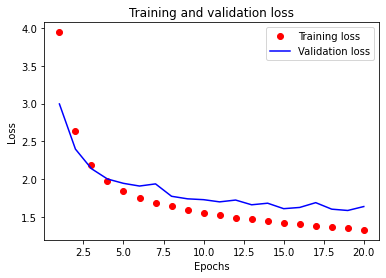

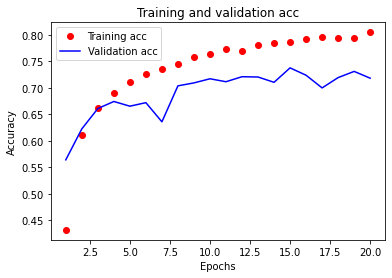

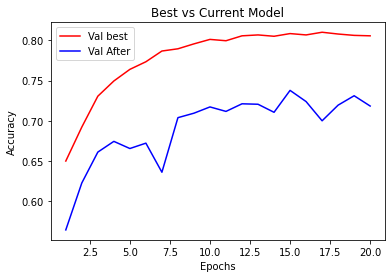

In [123]:
testFourteen = buildNeuralFourteen(48,48,0.01,0.01,20)
plot_loss(testFourteen)
plot_acc(testFourteen)
plot_comp_acc(testNine,testFourteen)

## Results:
Two l2 layers seem to compound the problem of statistic variance and acc

# Model 15: 48,DO(0.5),48,46 	

In [46]:
def buildNeuralFifteen(neuronsOne, neuronsTwo,do, ep):
    model = models.Sequential()
    
    model.add(layers.Dense(neuronsOne, activation = 'relu',input_shape = (10000,)))
    model.add(layers.Dropout(do))
    model.add(layers.Dense(neuronsTwo, activation = 'relu'))
    model.add(layers.Dense(46, activation = 'softmax'))
    
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    #mess with the hyperparameters (weights) Dropout
    #L2 


    history = model.fit(partial_x_train, 
                        partial_y_train,
                        epochs = ep,
                        batch_size = 512,
                        validation_data = (x_val, y_val))
    
    test_loss, test_acc = model.evaluate(x_test,one_hot_test_labels)
    
    return history

Train on 6982 samples, validate on 2000 samples
Epoch 1/20
6982/6982 [==============================] - 1s 199us/sample - loss: 3.1908 - accuracy: 0.2893 - val_loss: 2.4728 - val_accuracy: 0.4735
Epoch 2/20
6982/6982 [==============================] - 1s 104us/sample - loss: 2.1885 - accuracy: 0.5095 - val_loss: 1.8336 - val_accuracy: 0.6190
Epoch 3/20
6982/6982 [==============================] - 1s 102us/sample - loss: 1.7141 - accuracy: 0.5993 - val_loss: 1.5641 - val_accuracy: 0.6435
Epoch 4/20
6982/6982 [==============================] - 1s 102us/sample - loss: 1.4731 - accuracy: 0.6617 - val_loss: 1.4068 - val_accuracy: 0.6895
Epoch 5/20
6982/6982 [==============================] - 1s 104us/sample - loss: 1.3178 - accuracy: 0.6935 - val_loss: 1.3144 - val_accuracy: 0.7055
Epoch 6/20
6982/6982 [==============================] - 1s 104us/sample - loss: 1.1901 - accuracy: 0.7204 - val_loss: 1.2411 - val_accuracy: 0.7240
Epoch 7/20
6982/6982 [==============================] - 1s 102us

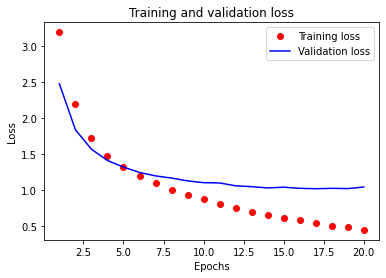

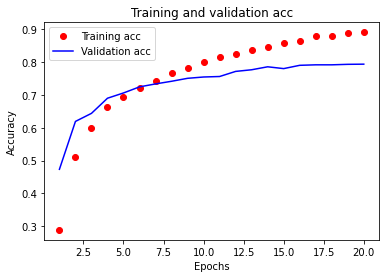

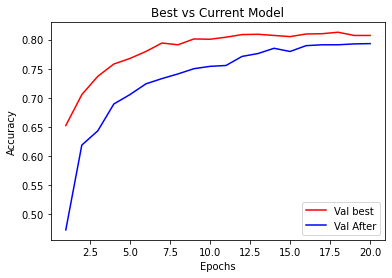

In [48]:
testFifteen = buildNeuralFifteen(48,48,0.5,20)
plot_loss(testFifteen)
plot_acc(testFifteen)
plot_comp_acc(testNine,testFifteen)

## Results:
Drop out is a far more stable way of producing regularization than l2 but accuracy is still a problem

# Model 16: 100,DO(0.5),48,46 	

Train on 7186 samples, validate on 1796 samples
Epoch 1/20
7186/7186 [==============================] - 2s 223us/sample - loss: 2.7905 - accuracy: 0.4738 - val_loss: 1.8636 - val_accuracy: 0.5896
Epoch 2/20
7186/7186 [==============================] - 1s 131us/sample - loss: 1.6620 - accuracy: 0.6223 - val_loss: 1.4879 - val_accuracy: 0.6732
Epoch 3/20
7186/7186 [==============================] - 1s 133us/sample - loss: 1.3368 - accuracy: 0.6993 - val_loss: 1.3522 - val_accuracy: 0.6965
Epoch 4/20
7186/7186 [==============================] - 1s 133us/sample - loss: 1.1381 - accuracy: 0.7409 - val_loss: 1.2213 - val_accuracy: 0.7372
Epoch 5/20
7186/7186 [==============================] - 1s 132us/sample - loss: 0.9934 - accuracy: 0.7792 - val_loss: 1.1611 - val_accuracy: 0.7461
Epoch 6/20
7186/7186 [==============================] - 1s 139us/sample - loss: 0.8743 - accuracy: 0.8055 - val_loss: 1.0987 - val_accuracy: 0.7595
Epoch 7/20
7186/7186 [==============================] - 1s 132us

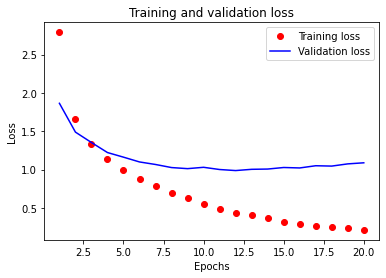

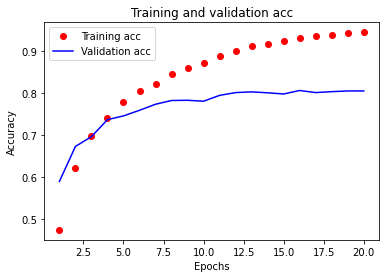

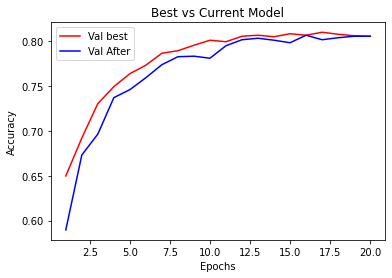

In [127]:
testSixteen = buildNeuralFifteen(100,48,0.5,20)
plot_loss(testSixteen)
plot_acc(testSixteen)
plot_comp_acc(testNine,testSixteen)

## Result: 
Accuracy has improved thanks to the increase of layer 1 capacity while overfitting is still a problem

# Model 17: 100,DO(0.5),100,48 	

Train on 6982 samples, validate on 2000 samples
Epoch 1/20
6982/6982 [==============================] - 2s 240us/sample - loss: 2.4692 - accuracy: 0.4754 - val_loss: 1.6769 - val_accuracy: 0.6195
Epoch 2/20
6982/6982 [==============================] - 1s 143us/sample - loss: 1.4769 - accuracy: 0.6633 - val_loss: 1.3633 - val_accuracy: 0.7015
Epoch 3/20
6982/6982 [==============================] - 1s 143us/sample - loss: 1.1838 - accuracy: 0.7299 - val_loss: 1.2252 - val_accuracy: 0.7305
Epoch 4/20
6982/6982 [==============================] - 1s 138us/sample - loss: 0.9975 - accuracy: 0.7774 - val_loss: 1.1263 - val_accuracy: 0.7510
Epoch 5/20
6982/6982 [==============================] - 1s 133us/sample - loss: 0.8489 - accuracy: 0.8101 - val_loss: 1.0533 - val_accuracy: 0.7780
Epoch 6/20
6982/6982 [==============================] - 1s 137us/sample - loss: 0.7322 - accuracy: 0.8364 - val_loss: 1.0219 - val_accuracy: 0.7760
Epoch 7/20
6982/6982 [==============================] - 1s 132us

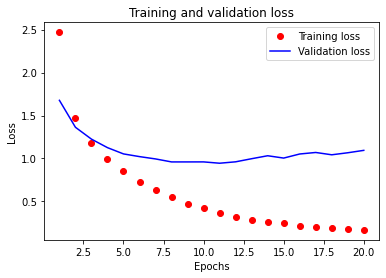

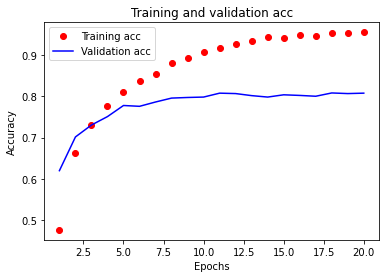

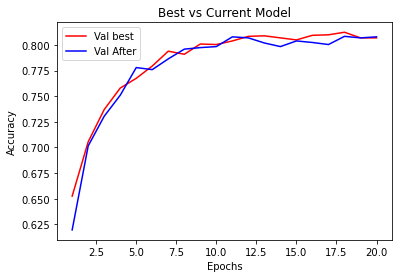

In [57]:
testSeventeen = buildNeuralFifteen(100,100,0.5,20)
plot_loss(testSeventeen)
plot_acc(testSeventeen)
plot_comp_acc(testNine,testSeventeen)

## Result:
The problem I am solving seems to be converging around 81% accuracy on the validation set.

# Model 18: 120,DO(0.5),120,48

Train on 6982 samples, validate on 2000 samples
Epoch 1/20
6982/6982 [==============================] - 2s 246us/sample - loss: 2.5031 - accuracy: 0.4996 - val_loss: 1.6275 - val_accuracy: 0.6500
Epoch 2/20
6982/6982 [==============================] - 1s 153us/sample - loss: 1.4290 - accuracy: 0.6805 - val_loss: 1.3370 - val_accuracy: 0.6945
Epoch 3/20
6982/6982 [==============================] - 1s 150us/sample - loss: 1.1443 - accuracy: 0.7412 - val_loss: 1.1990 - val_accuracy: 0.7295
Epoch 4/20
6982/6982 [==============================] - 1s 143us/sample - loss: 0.9563 - accuracy: 0.7807 - val_loss: 1.0943 - val_accuracy: 0.7620
Epoch 5/20
6982/6982 [==============================] - 1s 139us/sample - loss: 0.8087 - accuracy: 0.8150 - val_loss: 1.0639 - val_accuracy: 0.7640
Epoch 6/20
6982/6982 [==============================] - 1s 140us/sample - loss: 0.6708 - accuracy: 0.8460 - val_loss: 1.0088 - val_accuracy: 0.7845
Epoch 7/20
6982/6982 [==============================] - 1s 141us

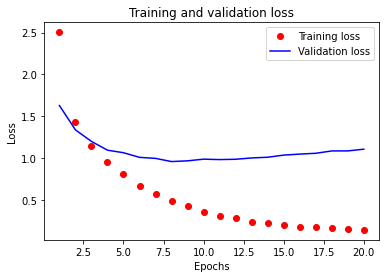

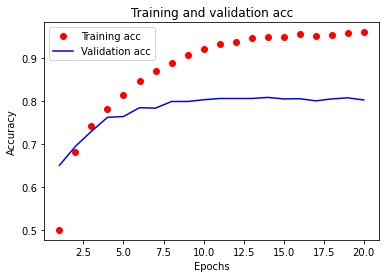

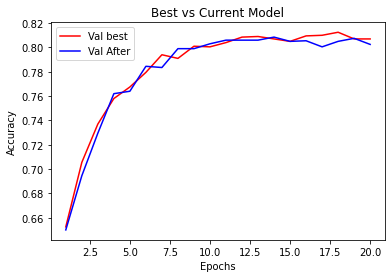

In [59]:
testEighteen = buildNeuralFifteen(120,120,0.5,20)
plot_loss(testEighteen)
plot_acc(testEighteen)
plot_comp_acc(testNine,testEighteen)

In [63]:
testEighteen = buildNeuralFifteen(120,120,0.5,20)
plot_loss(testEighteen)
plot_acc(testEighteen)
plot_comp_acc(testNine,testEighteen)

Train on 6982 samples, validate on 2000 samples
Epoch 1/20
6982/6982 [==============================] - 2s 216us/sample - loss: 2.7597 - accuracy: 0.5023 - val_loss: 1.9122 - val_accuracy: 0.6270
Epoch 2/20
6982/6982 [==============================] - 1s 115us/sample - loss: 1.5135 - accuracy: 0.6961 - val_loss: 1.4373 - val_accuracy: 0.6970
Epoch 3/20
6982/6982 [==============================] - 1s 115us/sample - loss: 1.1076 - accuracy: 0.7714 - val_loss: 1.2481 - val_accuracy: 0.7485
Epoch 4/20
6982/6982 [==============================] - 1s 122us/sample - loss: 0.8710 - accuracy: 0.8243 - val_loss: 1.1543 - val_accuracy: 0.7565
Epoch 5/20
6982/6982 [==============================] - 1s 118us/sample - loss: 0.7000 - accuracy: 0.8558 - val_loss: 1.0804 - val_accuracy: 0.7780
Epoch 6/20
6982/6982 [==============================] - 1s 116us/sample - loss: 0.5659 - accuracy: 0.8821 - val_loss: 1.0256 - val_accuracy: 0.7925
Epoch 7/20
6982/6982 [==============================] - 1s 113us

# Step 7: 
My best experiement was experiment 9 (100,DO(0.5),46) at 17 epochs so I'll train on whole training set and test on test set

In [132]:
model = models.Sequential()
model.add(layers.Dense(100, activation = 'relu',input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation = 'softmax'))
    
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    


history = model.fit(x_train, 
                    one_hot_train_labels,
                    epochs = 17,
                    batch_size = 512)
    
test_loss, test_acc = model.evaluate(x_test,one_hot_test_labels)
    
   

Train on 8982 samples
Epoch 1/17
8982/8982 [==============================] - 2s 172us/sample - loss: 2.4493 - accuracy: 0.5522
Epoch 2/17
8982/8982 [==============================] - 1s 113us/sample - loss: 1.4547 - accuracy: 0.7040
Epoch 3/17
8982/8982 [==============================] - 1s 112us/sample - loss: 1.1215 - accuracy: 0.7645
Epoch 4/17
8982/8982 [==============================] - 1s 114us/sample - loss: 0.9245 - accuracy: 0.8041
Epoch 5/17
8982/8982 [==============================] - 1s 113us/sample - loss: 0.7940 - accuracy: 0.8318
Epoch 6/17
8982/8982 [==============================] - 1s 111us/sample - loss: 0.6849 - accuracy: 0.8569
Epoch 7/17
8982/8982 [==============================] - 1s 111us/sample - loss: 0.5985 - accuracy: 0.8753
Epoch 8/17
8982/8982 [==============================] - 1s 111us/sample - loss: 0.5287 - accuracy: 0.8932
Epoch 9/17
8982/8982 [==============================] - 1s 116us/sample - loss: 0.4612 - accuracy: 0.9068
Epoch 10/17
8982/8982 [=